<a href="https://colab.research.google.com/github/Debajyoti2004/Encryptix/blob/main/CUSTOMER_CHURN_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

Load data

In [2]:
df= pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
columns=['RowNumber','CustomerId','Surname']
df.drop(columns,axis=1,inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Analysis

In [4]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

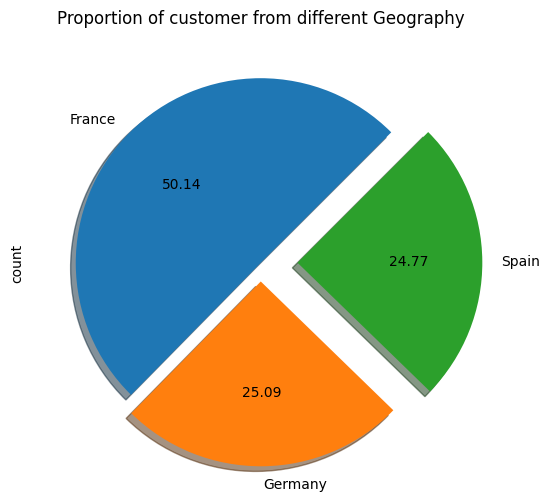

In [6]:
value_counts = pd.value_counts(df['Geography'])
plt.figure(figsize = (6,6))
value_counts.plot(kind = 'pie', explode = [0,0.1,0.2],autopct='%.2f', shadow=True,startangle=45)
plt.title('Proportion of customer from different Geography')
plt.show()

no. of unique places in geopgraphy:3
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


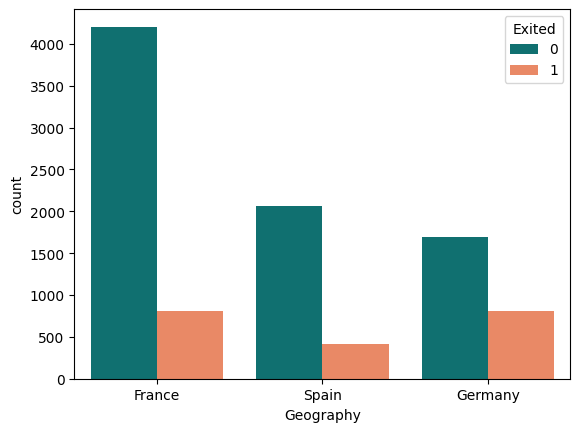

In [7]:
print(f"no. of unique places in geopgraphy:{df['Geography'].nunique()}")
print(df["Geography"].value_counts())

import seaborn as sns
sns.countplot(x="Geography",hue="Exited",palette=["Teal","coral"],data=df)
plt.show()



Gender
Male      5457
Female    4543
Name: count, dtype: int64


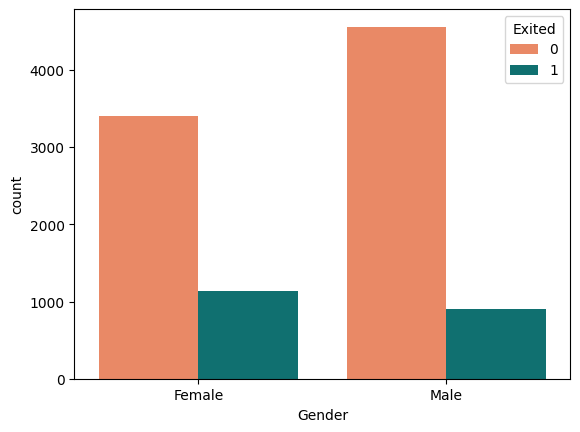

In [8]:
print(df['Gender'].value_counts())
sns.countplot(x="Gender",hue="Exited",palette=["coral","teal"],data=df)
plt.show()

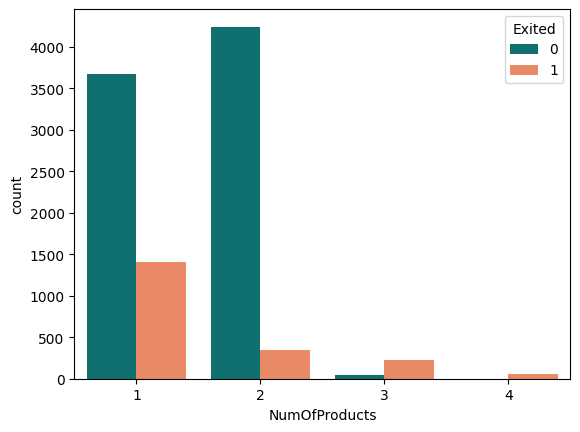

Exited,0,1
NumOfProducts,,
1,3675,1409
2,4242,348
3,46,220
4,0,60


In [9]:
sns.countplot(x="NumOfProducts",hue="Exited",palette=["teal","coral"],data=df)
plt.show()
pd.crosstab(df["NumOfProducts"],df["Exited"])

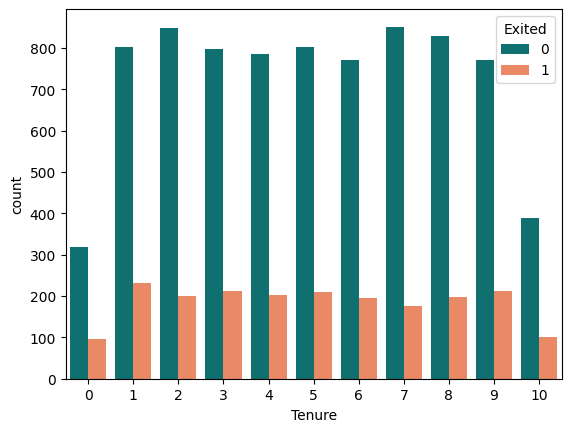

Exited,0,1
Tenure,,
0,318,95
1,803,232
2,847,201
3,796,213
4,786,203
5,803,209
6,771,196
7,851,177
8,828,197


In [10]:
sns.countplot(x="Tenure",hue="Exited",palette=["teal","coral"],data=df)
plt.show()
pd.crosstab(df["Tenure"],df["Exited"])

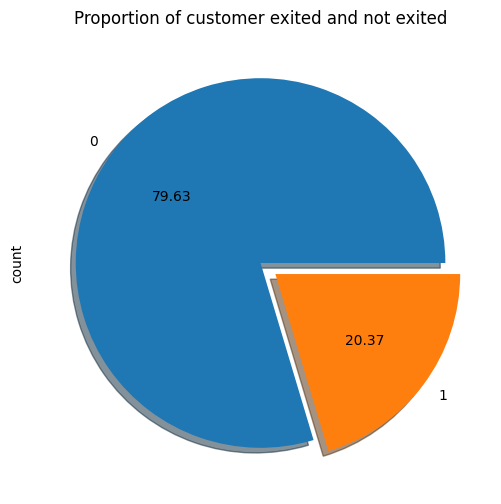

In [11]:
value_counts = pd.value_counts(df['Exited'])
plt.figure(figsize = (6,6))
value_counts.plot(kind = 'pie', explode = [0,0.1],autopct='%.2f', shadow=True)
plt.title('Proportion of customer exited and not exited')
plt.show()


<Axes: xlabel='Age', ylabel='Balance'>

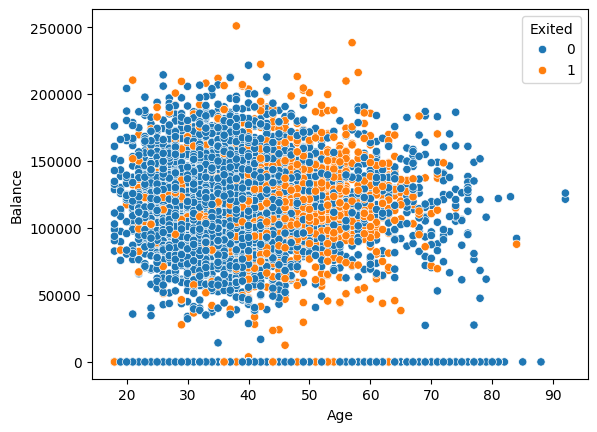

In [12]:
sns.scatterplot(x ="Age", y ="Balance", hue ="Exited", data = df)

<Axes: xlabel='Age', ylabel='CreditScore'>

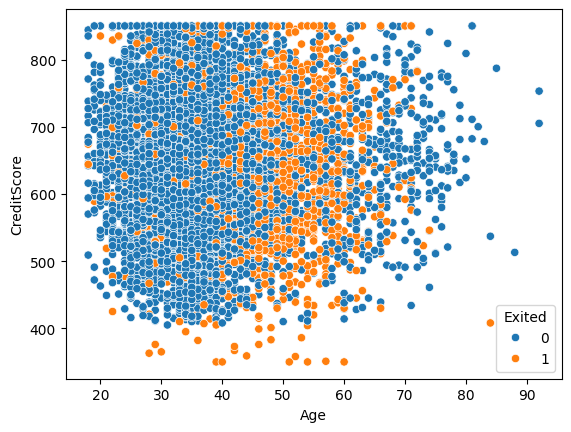

In [13]:
sns.scatterplot(x = "Age", y = "CreditScore", hue = "Exited", data = df)

<ipython-input-14-6508ff102929>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["CreditScore"])


<Axes: xlabel='CreditScore', ylabel='Density'>

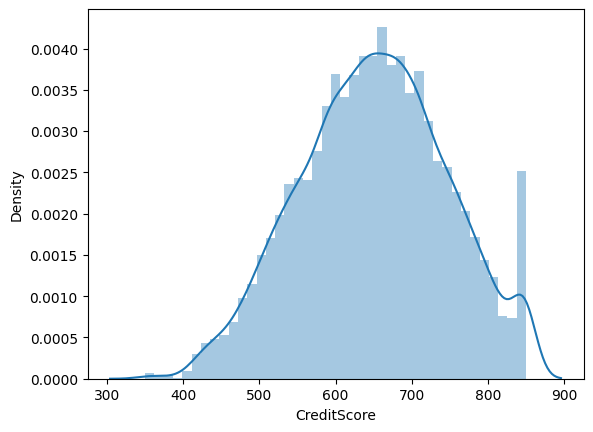

In [14]:
sns.distplot(df["CreditScore"])

<ipython-input-15-cf0334540b62>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])


<Axes: xlabel='Age', ylabel='Density'>

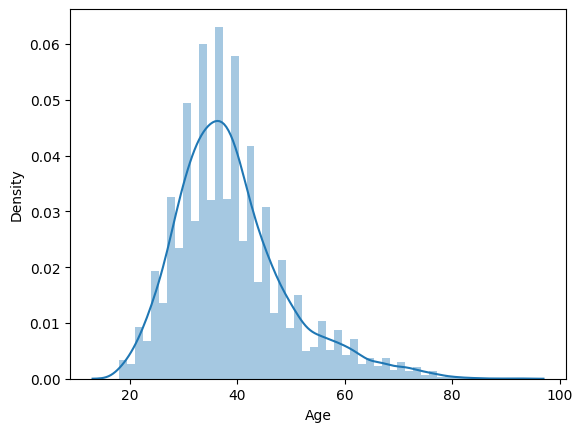

In [15]:
sns.distplot(df["Age"])

<ipython-input-16-52450403a539>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Tenure"])


<Axes: xlabel='Tenure', ylabel='Density'>

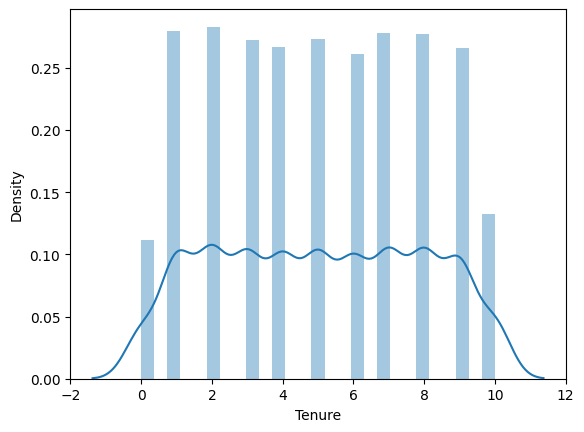

In [16]:
sns.distplot(df["Tenure"])

<Axes: >

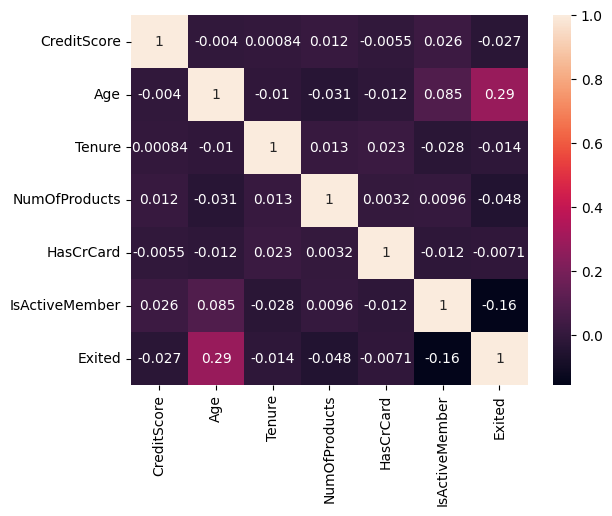

In [17]:
numerical_columns=df.select_dtypes(include=['int64'])
sns.heatmap(data=numerical_columns.corr(),annot=True)

(2037, 11)
(7963, 11)


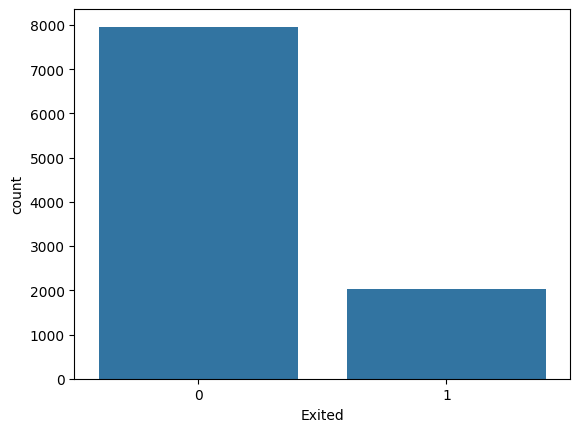

In [18]:
df_exited=df[df["Exited"]==1]
df_not_exited=df[df["Exited"]==0]
print(df_exited.shape)
print(df_not_exited.shape)

sns.countplot(x='Exited',data=df)
plt.show()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1


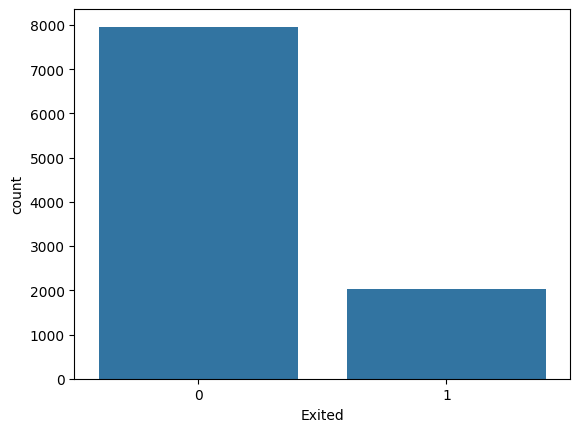

In [19]:
df_not_exited_sample=df_not_exited.sample(n=7963)
df_new= pd.concat([df_exited,df_not_exited_sample])

sns.countplot(x='Exited',data=df_new)
df_new.head()

Preprocessing the given data using pipeline and column transformer

In [20]:
categorical_features = ['Geography', 'Gender', 'NumOfProducts']
numerical_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'
)

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])



In [21]:
X=df_new.drop('Exited',axis=1)
y=df_new['Exited']
print(f"shape of X:{X.shape}")
print(f"shape of y:{y.shape}")

shape of X:(10000, 10)
shape of y:(10000,)


Split the data into train and test example

In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [23]:
preprocessedf_X_train=pipeline.fit_transform(x_train)
preprocessedf_X_test=pipeline.transform(x_test)
print(f"shape of preprocessedf_X_train:{preprocessedf_X_train.shape}")
print(f"shape of preprocessedf_X_test:{preprocessedf_X_test.shape}")
print(f"shape of y_train:{y_train.shape}")
print(f"shape of y_test:{y_test.shape}")

shape of preprocessedf_X_train:(8000, 16)
shape of preprocessedf_X_test:(2000, 16)
shape of y_train:(8000,)
shape of y_test:(2000,)


XGBClassifier model:

In [24]:
n_estimator_list=[10,20,40,50,80,100,200,300]
max_depth_list=[2,4,8,16,32,64,None]
learning_rate_list=[0.001,0.01,0.1,0.2,0.3]

In [25]:
Training_accuracy_depth = []
Test_accuracy_depth=[]


for max_depth in max_depth_list:
    model = XGBClassifier(max_depth=max_depth, random_state=0)
    model.fit(preprocessedf_X_train, y_train)

    # Predictions and accuracy on training set
    predicted_y= model.predict(preprocessedf_X_train)
    accuracy = accuracy_score(y_train, predicted_y)
    Training_accuracy_depth.append(accuracy)

    # Predictions and accuracy on test set
    predicted_y_test = model.predict(preprocessedf_X_test)
    accuracy_test = accuracy_score(y_test, predicted_y_test)
    Test_accuracy_depth.append(accuracy_test)

print(f"Training accuracy={Training_accuracy_depth}")
print(f"Test accuracy={Test_accuracy_depth}")


Training accuracy=[0.868, 0.902375, 0.997875, 1.0, 1.0, 1.0, 0.960625]
Test accuracy=[0.8715, 0.872, 0.863, 0.861, 0.858, 0.858, 0.864]


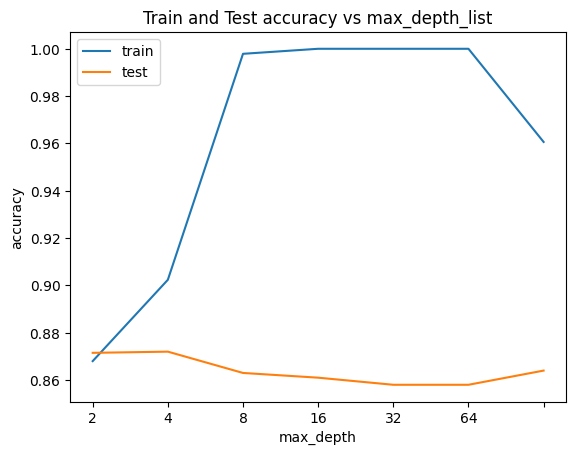

In [26]:
plt.title('Train and Test accuracy vs max_depth_list')
plt.plot(Training_accuracy_depth,label='train')
plt.plot(Test_accuracy_depth,label='test')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(max_depth_list)),labels=max_depth_list)
plt.legend(loc='best')
plt.show()



In [27]:
Training_accuracy_tree = []
Test_accuracy_tree=[]

for n_estimator in n_estimator_list:
    model = XGBClassifier(n_estimators=n_estimator,random_state=0)
    model.fit(preprocessedf_X_train, y_train)

    #prediction accuracy of training set
    predicted_y = model.predict(preprocessedf_X_train)
    accuracy = accuracy_score(y_train, predicted_y)
    Training_accuracy_tree.append(accuracy)

    #prediction accuracy of test set
    predicted_y_test = model.predict(preprocessedf_X_test)
    accuracy_test = accuracy_score(y_test, predicted_y_test)
    Test_accuracy_tree.append(accuracy_test)


print(f"Training accuracy: {Training_accuracy_tree}")
print(f"Test accuracy={Test_accuracy_tree}")


Training accuracy: [0.8735, 0.8885, 0.909625, 0.919375, 0.945125, 0.960625, 0.99425, 1.0]
Test accuracy=[0.868, 0.875, 0.871, 0.868, 0.865, 0.864, 0.8555, 0.8545]


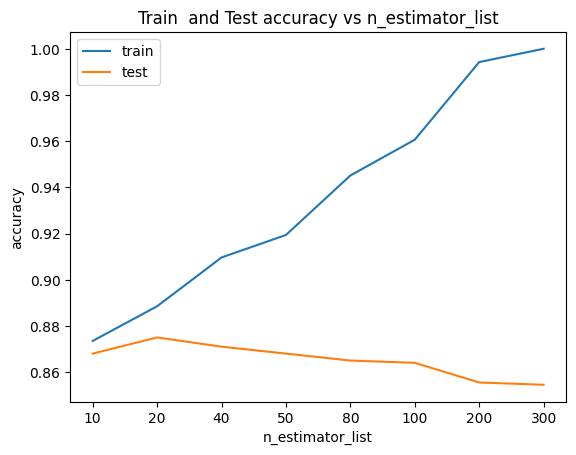

In [28]:
plt.title('Train  and Test accuracy vs n_estimator_list')
plt.plot(Training_accuracy_tree,label='train')
plt.plot(Test_accuracy_tree,label='test')
plt.xlabel('n_estimator_list')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(n_estimator_list)),labels=n_estimator_list)
plt.legend(loc='best')
plt.show()

In [29]:
n_estimator=300
max_depth=16
train_accuracy_list=[]
test_accuracy_list=[]

for learning_rate in learning_rate_list:
    model = XGBClassifier(n_estimators=n_estimator,max_depth=max_depth,learning_rate=learning_rate,random_state=0)
    model.fit(preprocessedf_X_train, y_train)

    #prediction accuracy of training set
    predicted_y_train= model.predict(preprocessedf_X_train)
    train_accuracy = accuracy_score(y_train, predicted_y_train)
    train_accuracy_list.append(train_accuracy)
    print(f"Learning rate: {learning_rate}, Train Accuracy: {train_accuracy}")

    #prediction accuracy of test set
    predicted_y_test = model.predict(preprocessedf_X_test)
    accuracy_test = accuracy_score(y_test, predicted_y_test)
    test_accuracy_list.append(accuracy_test)
    print(f"Learning rate: {learning_rate}, Test Accuracy: {accuracy_test}")


Learning rate: 0.001, Train Accuracy: 0.79375
Learning rate: 0.001, Test Accuracy: 0.8065
Learning rate: 0.01, Train Accuracy: 0.975375
Learning rate: 0.01, Test Accuracy: 0.8615
Learning rate: 0.1, Train Accuracy: 1.0
Learning rate: 0.1, Test Accuracy: 0.8615
Learning rate: 0.2, Train Accuracy: 1.0
Learning rate: 0.2, Test Accuracy: 0.861
Learning rate: 0.3, Train Accuracy: 1.0
Learning rate: 0.3, Test Accuracy: 0.8595


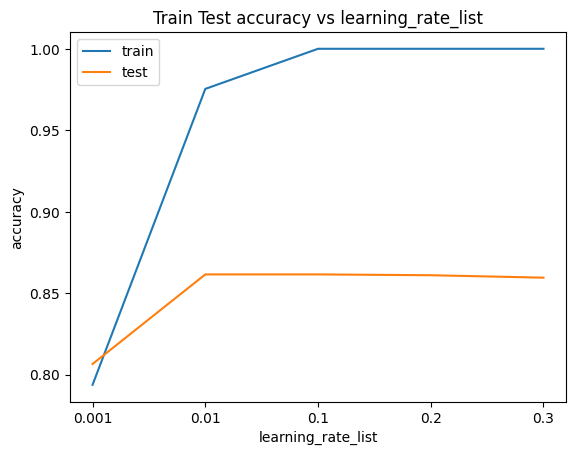

In [30]:
plt.title('Train Test accuracy vs learning_rate_list')
plt.plot(train_accuracy_list,label='train')
plt.plot(test_accuracy_list,label='test')
plt.xlabel('learning_rate_list')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(learning_rate_list)),labels=learning_rate_list)
plt.legend(loc='best')
plt.show()

In [31]:
n_estimator=300
max_depth=16
learning_rate=0.1

model_v1= XGBClassifier(n_estimators=n_estimator,max_depth=max_depth,learning_rate=learning_rate,random_state=0)
model_v1.fit(preprocessedf_X_train, y_train,eval_set=[(preprocessedf_X_test,y_test)])

[0]	validation_0-logloss:0.46724
[1]	validation_0-logloss:0.44466
[2]	validation_0-logloss:0.42783
[3]	validation_0-logloss:0.41230
[4]	validation_0-logloss:0.40011
[5]	validation_0-logloss:0.38995
[6]	validation_0-logloss:0.38101
[7]	validation_0-logloss:0.37392
[8]	validation_0-logloss:0.36767
[9]	validation_0-logloss:0.36293
[10]	validation_0-logloss:0.35882
[11]	validation_0-logloss:0.35435
[12]	validation_0-logloss:0.35197
[13]	validation_0-logloss:0.34938
[14]	validation_0-logloss:0.34752
[15]	validation_0-logloss:0.34578
[16]	validation_0-logloss:0.34443
[17]	validation_0-logloss:0.34347
[18]	validation_0-logloss:0.34238
[19]	validation_0-logloss:0.34120
[20]	validation_0-logloss:0.34031
[21]	validation_0-logloss:0.33983
[22]	validation_0-logloss:0.33903
[23]	validation_0-logloss:0.33923
[24]	validation_0-logloss:0.33957
[25]	validation_0-logloss:0.33967
[26]	validation_0-logloss:0.34005
[27]	validation_0-logloss:0.33979
[28]	validation_0-logloss:0.33958
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=16, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [32]:
yhat_train= model_v1.predict(preprocessedf_X_train)
accuracy_score(y_train,yhat_train)
print(f"train_accuracy_score: {accuracy_score(y_train,yhat_train)}")
print(f"train confusion_matrix: {confusion_matrix(y_train,yhat_train)}")
print(f"Train classification_report: {classification_report(y_train,yhat_train)}")

yhat_test= model_v1.predict(preprocessedf_X_test)
accuracy_score(y_test,yhat_test)
print(f"test_accuracy_score: {accuracy_score(y_test,yhat_test)}")
print(f"test confusion_matrix: {confusion_matrix(y_test,yhat_test)}")
print(f"Test classification_report: {classification_report(y_test,yhat_test)}")

train_accuracy_score: 1.0
train confusion_matrix: [[6350    0]
 [   0 1650]]
Train classification_report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6350
           1       1.00      1.00      1.00      1650

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

test_accuracy_score: 0.8615
test confusion_matrix: [[1524   89]
 [ 188  199]]
Test classification_report:               precision    recall  f1-score   support

           0       0.89      0.94      0.92      1613
           1       0.69      0.51      0.59       387

    accuracy                           0.86      2000
   macro avg       0.79      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



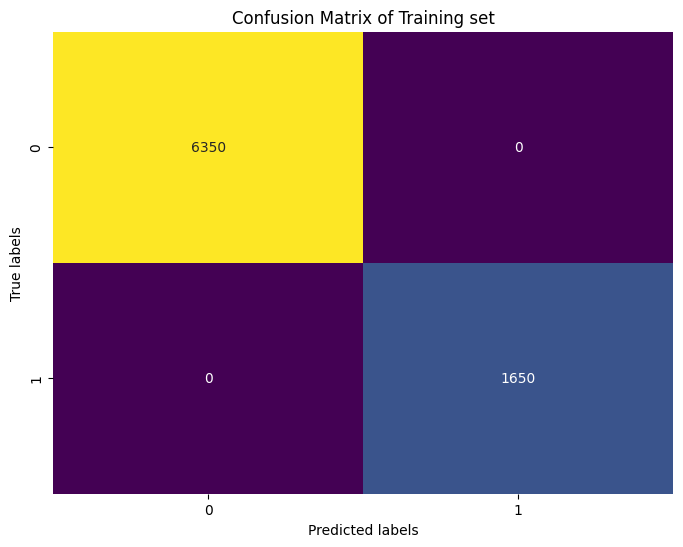

In [33]:
train_conf_matrix=confusion_matrix(y_train,yhat_train)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(train_conf_matrix, annot=True, fmt="d", cmap="viridis", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix of Training set")
plt.show()

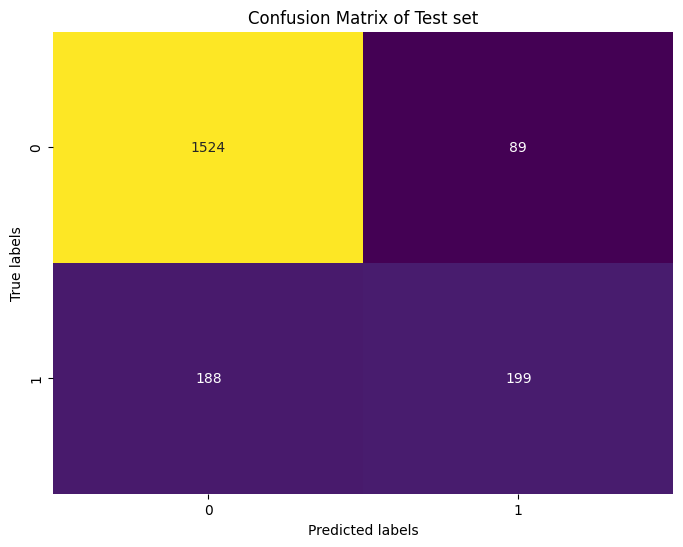

In [35]:
test_conf_matrix=confusion_matrix(y_test,yhat_test)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt="d", cmap="viridis", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix of Test set")
plt.show()

Logistic Regression Model:

In [36]:
def Accuracy_score(y_true, y_pred):
    if len(y_true) == 0:
        raise ValueError("y_true is empty")
    if len(y_true) != len(y_pred):
        raise ValueError("y_true and y_pred must have the same length")

    intersect = np.sum(y_true == y_pred)
    length = len(y_true)
    accuracy = intersect / length
    return accuracy


In [37]:

def y_pred(Y, threshold):
    return [1 if y >= threshold else 0 for y in Y]


In [38]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

# logist regression model
logits_model=LogisticRegression(max_iter=400)
logits_model.fit(preprocessedf_X_train,y_train)
y_pred_train=logits_model.predict(preprocessedf_X_train)
y_pred_train_=y_pred(y_pred_train,0.5)
print(f"accuracy score of train set={Accuracy_score(y_train,y_pred_train_)}")
y_pred_test=logits_model.predict(preprocessedf_X_test)
y_pred_test_=y_pred(y_pred_test,0.5)
print(f"accuracy score of test set={Accuracy_score(y_test,y_pred_test_)}")

conf_matrix=confusion_matrix(y_test,y_pred_test_)
print(f"confusion matrix of test example={conf_matrix}")


f1_score_train=f1_score(y_train,y_pred_train_)
print(f"f1_score train={f1_score_train}")
f1_score_test=f1_score(y_test,y_pred_test_)
print(f"f1_score test={f1_score_test}")


accuracy score of train set=0.837625
accuracy score of test set=0.855
confusion matrix of test example=[[1565   48]
 [ 242  145]]
f1_score train=0.4887839433293979
f1_score test=0.5


In [43]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout,Input
from tensorflow.keras.models import Model

class CustomLogisticRegression(Model):
    def __init__(self, units=1, activation='sigmoid', dropout_rate=0.5):
        super(CustomLogisticRegression, self).__init__()
        self.Dense1 = Dense(units=6, activation='relu')
        self.Dropout1 = Dropout(dropout_rate)
        self.Dense2 = Dense(units=6, activation='relu')
        self.Dropout2 = Dropout(dropout_rate)
        self.Dense3 = Dense(units=1, activation=activation)

    def call(self, inputs):
        x = self.Dense1(inputs)
        x = self.Dropout1(x)
        x = self.Dense2(x)
        x = self.Dropout2(x)
        output = self.Dense3(x)
        return output

In [44]:
input=Input(shape=(16,))
model_v2= CustomLogisticRegression(dropout_rate=0.1)
output=model_v2(input)
model_v2.summary()

Model: "custom_logistic_regression_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             multiple                  102       
                                                                 
 dropout_2 (Dropout)         multiple                  0         
                                                                 
 dense_4 (Dense)             multiple                  42        
                                                                 
 dropout_3 (Dropout)         multiple                  0         
                                                                 
 dense_5 (Dense)             multiple                  7         
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
class MyCustomCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold=0.98):
        super(MyCustomCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') > self.threshold:
            print(f"\nReached {self.threshold * 100}% accuracy, stopping training!")
            self.model.stop_training = True


In [47]:
from tensorflow.keras.optimizers import Adam
early_stopping=MyCustomCallback()
model_v2.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
model_v2_history=model_v2.fit(preprocessedf_X_train,y_train,epochs=100,validation_data=(preprocessedf_X_test,y_test),callbacks=[early_stopping])

Epoch 1/100
250/250 [==============================] - 2s 4ms/step - loss: 0.6309 - accuracy: 0.7040 - val_loss: 0.4688 - val_accuracy: 0.8085
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4937 - accuracy: 0.7887 - val_loss: 0.4355 - val_accuracy: 0.8095
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4626 - accuracy: 0.7933 - val_loss: 0.4041 - val_accuracy: 0.8175
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4353 - accuracy: 0.7987 - val_loss: 0.3851 - val_accuracy: 0.8245
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4180 - accuracy: 0.8054 - val_loss: 0.3781 - val_accuracy: 0.8290
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4142 - accuracy: 0.8112 - val_loss: 0.3737 - val_accuracy: 0.8345
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4111 - accuracy: 0.8136 - val_loss: 0.3685 - val_accuracy: 0.8365

In [48]:
ypred_train=model_v2.predict(preprocessedf_X_train)
ypred_test=model_v2.predict(preprocessedf_X_test)

ypred_train=tf.where(ypred_train>0.5,1,0)
ypred_test=tf.where(ypred_test>0.5,1,0)
print(f"accuracy score of train set={accuracy_score(y_train,ypred_train)}")
print(f"confusion matrix of training example={confusion_matrix(ypred_train,y_train)}")
print(f"accuracy score of test set={accuracy_score(y_test,ypred_test)}")
print(f"confusion matrix of test example={confusion_matrix(ypred_test,y_test)}")

63/63 [==============================] - 0s 2ms/step
accuracy score of train set=0.864625
confusion matrix of training example=[[6181  914]
 [ 169  736]]
accuracy score of test set=0.8665
confusion matrix of test example=[[1567  221]
 [  46  166]]


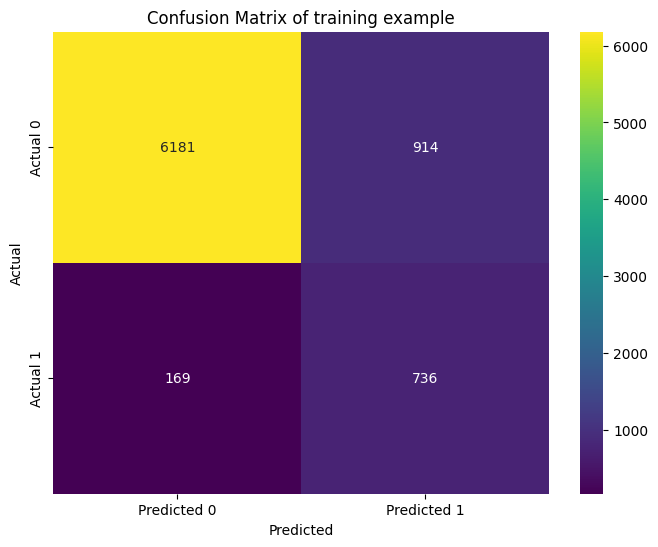

In [49]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(ypred_train,y_train), annot=True, fmt='d',cmap='viridis', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of training example')
plt.show()

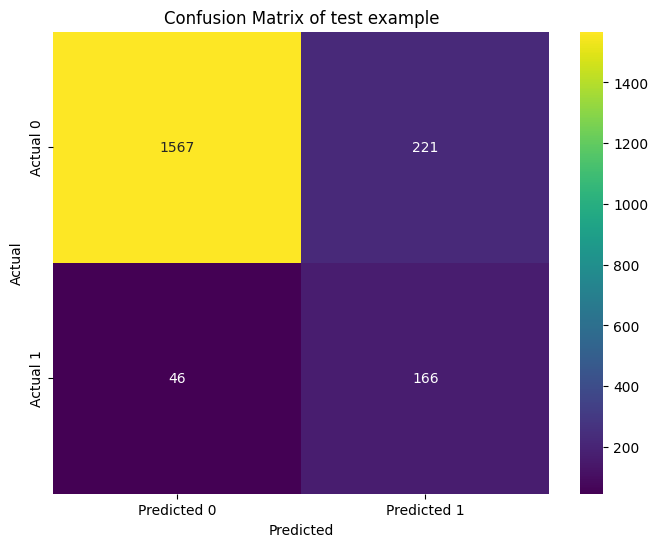

In [50]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(ypred_test,y_test), annot=True, fmt='d', cmap='viridis', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of test example')
plt.show()

Random Forest Classifier Model:

In [51]:
from sklearn.ensemble import RandomForestClassifier

min_sample_split_list=[2,10,30,50,100,200,300,700]

training_accuracy=[]
val_accuracy=[]

for min_sample_split in min_sample_split_list:
  model=RandomForestClassifier(max_depth=None,min_samples_split=min_sample_split)
  model.fit(preprocessedf_X_train,y_train)
  predicted_y_train=model.predict(preprocessedf_X_train)
  accuracy_train=Accuracy_score(y_train,predicted_y_train)
  training_accuracy.append(accuracy_train)

  predicted_y_val=model.predict(preprocessedf_X_test)
  accuracy_val=Accuracy_score(y_test,predicted_y_val)
  val_accuracy.append(accuracy_val)


print(f"training accuracy={training_accuracy}")
print(f"val accuracy={val_accuracy}")


training accuracy=[1.0, 0.929625, 0.88675, 0.876375, 0.8645, 0.861, 0.85825, 0.8465]
val accuracy=[0.8695, 0.866, 0.871, 0.8695, 0.8705, 0.8695, 0.87, 0.8565]


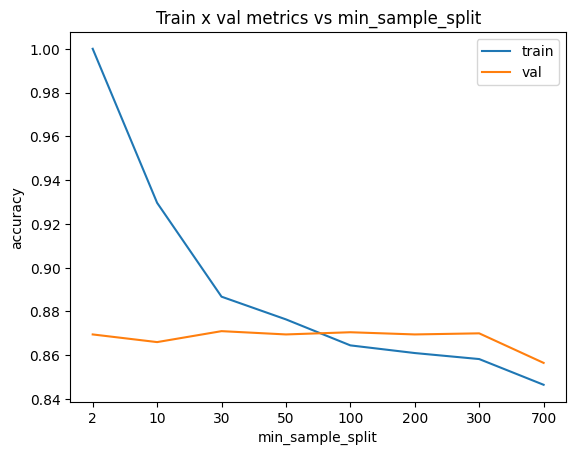

In [52]:
plt.title('Train x val metrics vs min_sample_split')
plt.plot(training_accuracy,label='train')
plt.plot(val_accuracy,label='val')
plt.xlabel('min_sample_split')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(min_sample_split_list)),labels=min_sample_split_list)
plt.legend(loc='best')
plt.show()



In [53]:
max_depth_list=[2,4,8,16,32,64,None]
Training_accuracy_depth=[]
val_accuracy_depth=[]

for max_depth in max_depth_list:
  model=RandomForestClassifier(max_depth=max_depth,random_state=0)
  model.fit(preprocessedf_X_train,y_train)
  predicted_y_train=model.predict(preprocessedf_X_train)
  accuracy_train=Accuracy_score(y_train,predicted_y_train)
  Training_accuracy_depth.append(accuracy_train)

  predicted_y_val=model.predict(preprocessedf_X_test)
  accuracy_val=Accuracy_score(y_test,predicted_y_val)
  val_accuracy_depth.append(accuracy_val)



print(f"training accuracy={Training_accuracy_depth}")
print(f"val accuracy={val_accuracy_depth}")

training accuracy=[0.800125, 0.842125, 0.87575, 0.9905, 0.999875, 0.999875, 0.999875]
val accuracy=[0.8125, 0.85, 0.869, 0.868, 0.866, 0.866, 0.866]


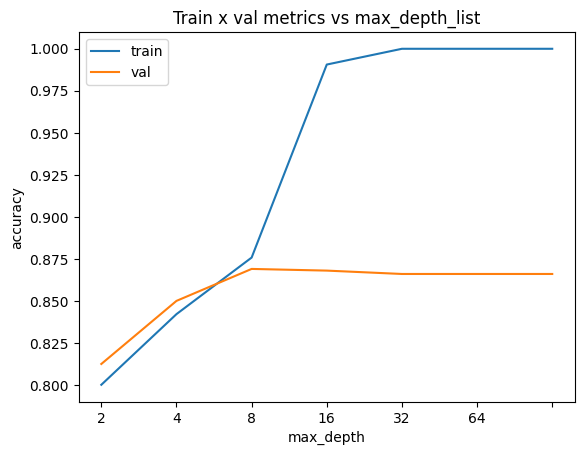

In [54]:
plt.title('Train x val metrics vs max_depth_list')
plt.plot(Training_accuracy_depth,label='train')
plt.plot(val_accuracy_depth,label='val')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(max_depth_list)),labels=max_depth_list)
plt.legend(loc='best')
plt.show()


In [57]:
n_estimator_list=[10,20,40,50,80,100,200,300]
Training_accuracy_tree = []
val_accuracy_tree = []

for n_estimator in n_estimator_list:
    model = RandomForestClassifier(n_estimators=n_estimator, random_state=0)
    model.fit(preprocessedf_X_train,y_train)
    predicted_y_train=model.predict(preprocessedf_X_train)
    accuracy_train=Accuracy_score(y_train,predicted_y_train)
    Training_accuracy_tree.append(accuracy_train)

    predicted_y_val=model.predict(preprocessedf_X_test)
    accuracy_val=Accuracy_score(y_test,predicted_y_val)
    val_accuracy_tree.append(accuracy_val)

print(f"Training accuracy: {Training_accuracy_tree}")
print(f"Validation accuracy: {val_accuracy_tree}")


Training accuracy: [0.981375, 0.994125, 0.998, 0.99925, 0.999875, 0.999875, 1.0, 1.0]
Validation accuracy: [0.862, 0.865, 0.8695, 0.866, 0.8695, 0.866, 0.8645, 0.8675]


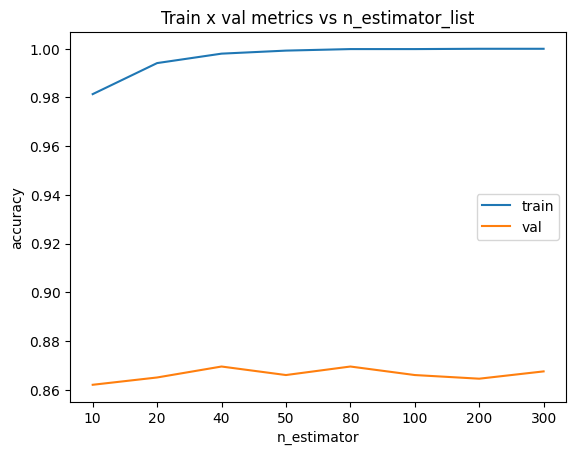

In [58]:
plt.title('Train x val metrics vs n_estimator_list')
plt.plot(Training_accuracy_tree,label='train')
plt.plot(val_accuracy_tree,label='val')
plt.xlabel('n_estimator')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(n_estimator_list)),labels=n_estimator_list)
plt.legend(loc='best')
plt.show()

In [59]:

min_sample_split=30
max_depth=16
n_estimator=50

tree_ensemble_model=RandomForestClassifier(min_samples_split=min_sample_split,max_depth=max_depth,n_estimators=n_estimator)
tree_ensemble_model.fit(preprocessedf_X_train,y_train)

predicted_y_train=tree_ensemble_model.predict(preprocessedf_X_train)
training_accuracy=Accuracy_score(y_train,predicted_y_train)

predicted_y_test=tree_ensemble_model.predict(preprocessedf_X_test)
val_accuracy=accuracy_score(y_test,predicted_y_test)

print(f"accuracy of the training example={training_accuracy}")
print(f"accuracy of the val example={val_accuracy}")

f1_score_tree_ensemble_train=f1_score(y_train,predicted_y_train)
print(f"f1_score train={f1_score_tree_ensemble_train}")
f1_score_tree_ensemble_test=f1_score(y_test,predicted_y_test)
print(f"f1_score test={f1_score_tree_ensemble_test}")


accuracy of the training example=0.888625
accuracy of the val example=0.8715
f1_score train=0.6654149455501314
f1_score test=0.5793780687397709


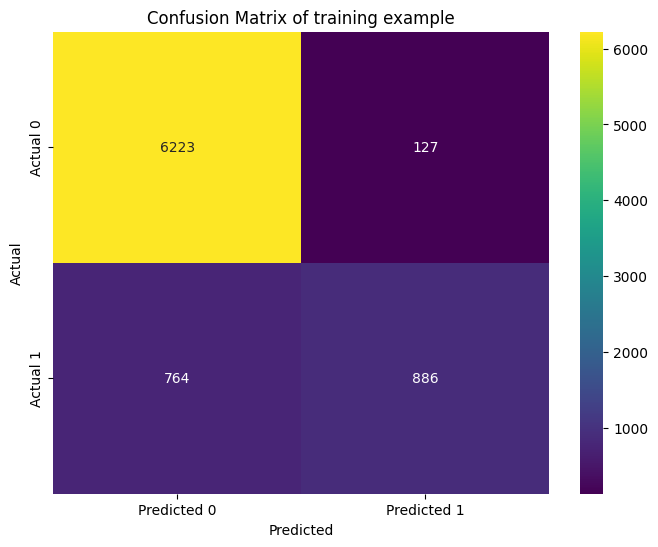

In [60]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_train,predicted_y_train), annot=True, fmt='d',cmap='viridis', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of training example')
plt.show()

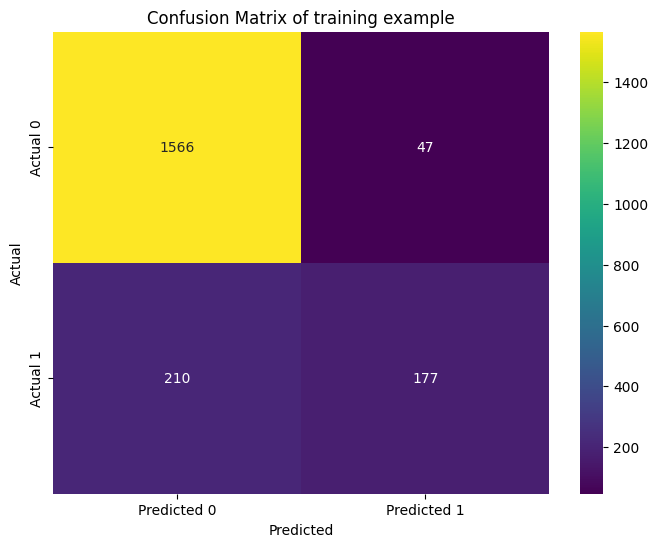

In [61]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test,predicted_y_test), annot=True, fmt='d',cmap='viridis', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of training example')
plt.show()

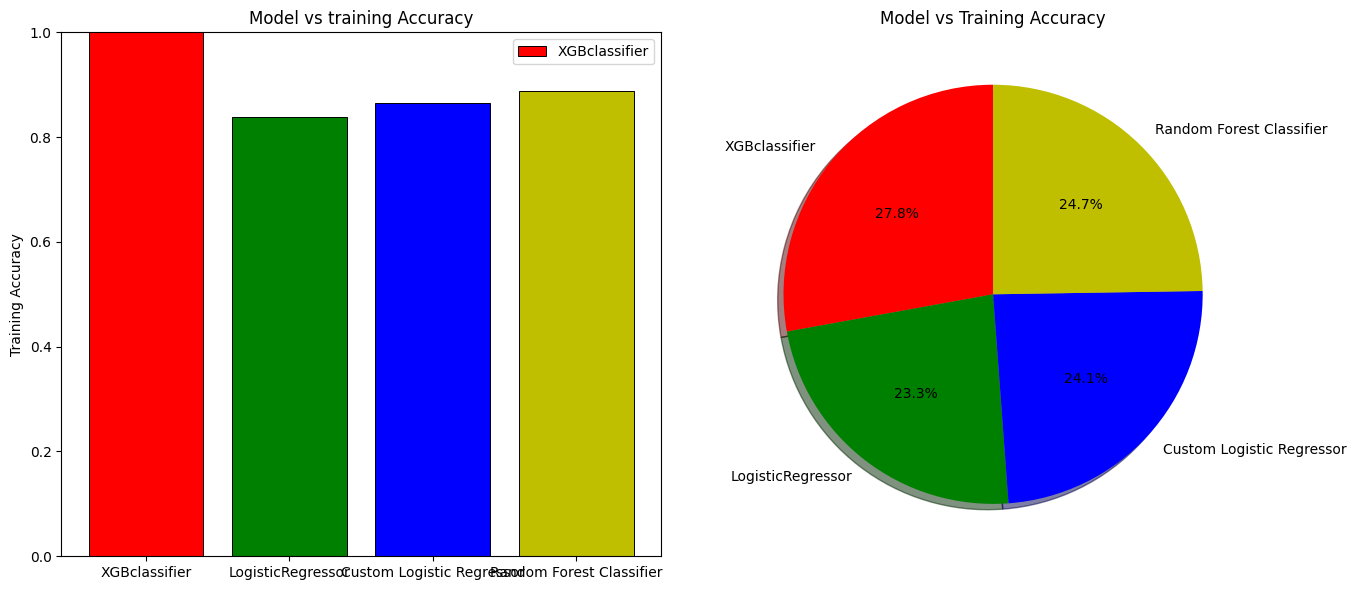

In [65]:
train_accuracy=[accuracy_score(y_train,yhat_train),Accuracy_score(y_train,y_pred_train_),accuracy_score(y_train,ypred_train),Accuracy_score(y_train,predicted_y_train)]
Models = ['XGBclassifier', 'LogisticRegressor', 'Custom Logistic Regressor', 'Random Forest Classifier']
colors = ['r', 'g', 'b', 'y']

# Create a figure and subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot
ax[0].bar(Models, train_accuracy, color=colors, edgecolor='black', linewidth=0.7)
ax[0].set_title('Model vs training Accuracy')
ax[0].set_ylabel('Training Accuracy')
ax[0].set_ylim([0, 1])
ax[0].legend(Models, loc='best')

# Pie chart
ax[1].pie(train_accuracy, labels=Models, colors=colors, autopct='%1.1f%%', startangle=90,shadow=True)
ax[1].set_title('Model vs Training Accuracy')

# Display the plots
plt.tight_layout()
plt.show()


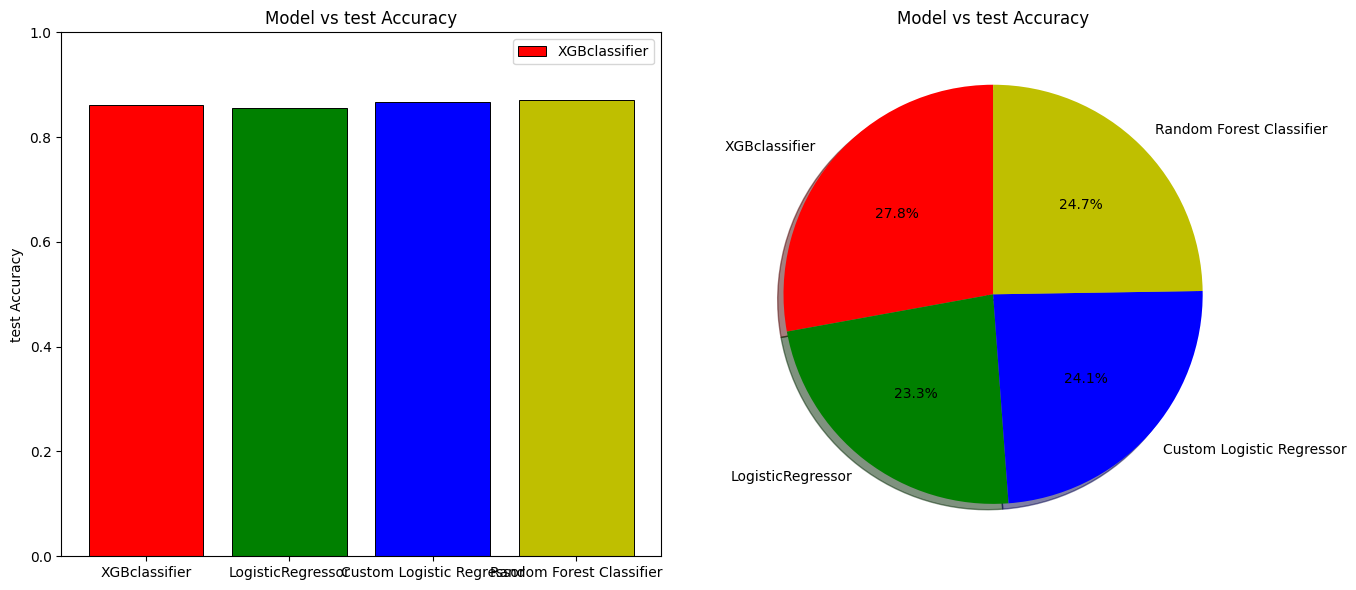

In [66]:
test_accuracy=[accuracy_score(y_test,yhat_test),Accuracy_score(y_test,y_pred_test_),accuracy_score(y_test,ypred_test),accuracy_score(y_test,predicted_y_test)]

Models = ['XGBclassifier', 'LogisticRegressor', 'Custom Logistic Regressor', 'Random Forest Classifier']
colors = ['r', 'g', 'b', 'y']

# Create a figure and subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot
ax[0].bar(Models, test_accuracy, color=colors, edgecolor='black', linewidth=0.7)
ax[0].set_title('Model vs test Accuracy')
ax[0].set_ylabel('test Accuracy')
ax[0].set_ylim([0, 1])
ax[0].legend(Models, loc='best')

# Pie chart
ax[1].pie(train_accuracy, labels=Models, colors=colors, autopct='%1.1f%%', startangle=90,shadow=True)
ax[1].set_title('Model vs test Accuracy')

# Display the plots
plt.tight_layout()
plt.show()
